## Problem Solutions



### 1 

1. Assume you flip a fair coin 7 times and are looking for one of two patterns:  𝐻𝑇  or  𝐻𝐻 . Find the probability of each pattern showing up, and check which one, if any, is more likely.


In [1]:

import numpy as np
S=set()
for j in np.arange(128):
    S.add( np.binary_repr(j, width = 7) )
    
import re 
A_HT = set() 
for outcome in S:
    if re.search('10', outcome):
        A_HT.add(outcome)
        
A_HH = set()
for outcome in S:
    if re.search('11', outcome):
        A_HH.add(outcome)

def DU_prob( event, sample_space ):
    print( len(event) / len(sample_space) )
    
DU_prob(A_HT, S)  # Probability of HT
DU_prob(A_HH, S)  # Probability of HH

0.9375
0.734375


You might think that since the coin is fair, the specific pattern does not matter, only the length.
But as you can see it *does*; see [this post](https://stats.stackexchange.com/questions/305699/occurrence-of-at-least-1-ht-and-hh-in-sequences-of-4-coin-flips-not-equally-like) for an intuitive explanation.

### 2

1. Find the number of labeled, directed graphs of node size $n$ *including* possible loops.

There are $ _{n} P_{2} = n(n-1)$ ordered pairs of different nodes and $n$ possible loops, which means $n^2-n+n=n^2$ possible directed edges, hence there are $2^{n^2}$ possible graphs.

2. Find the number of simple [complete graphs](https://en.wikipedia.org/wiki/Complete_graph), either labeled or unlabeled.

A complete graph is one where *every* node is connected to every other node. Hence, there is only one such labeled graph with all ${n \choose 2}$ possible edges present. Removing the labels does not change that (any permutation of the labels in a complete labeled graph is isomorphic).

3. A directed, complete graph is called a [tournament](https://en.wikipedia.org/wiki/Tournament_(graph_theory)). Find the number of tournaments of node size $n$.

A complete digraph has ${n \choose 2}$ edges, and for each edge there are $2$ options, hence there are $2^{ {n \choose 2} }$ possible labeled tournaments. 

4. In a labeled *complete* graph of size $n$, show that the number of paths of length $k, 0 \le k \le n-2 $ between two nodes is $ \frac{ (n-2)! }{(n-2-k)! }$.

If we fix two nodes, we can use the remaining $n-2$ to form a path of length $0\le k \le n-2$. Since the graph is complete, there are no restrictions on connectivity; the only thing that characterizes the path is the order in which the in-between nodes (if any) are visited. Hence, for fixed path length $k$, there are ${n-2 \choose k}$ ways to select the in-between nodes, times $k!$ ways to order them, which lead to a total of 
$$ {n-2 \choose k} \times k! = \frac{ (n-2)! }{(n-2-k)! \times k! } \times k! =   \frac{ (n-2)! }{(n-2-k)! }$$


5. Use 4. to show that the *total* number of paths between two nodes in a labeled complete graph of size $n$ is 
$$  \lfloor e \cdot (n−2)!  \rfloor$$

We sum up the number of paths of different lengths:
$$ \sum_{k=0}^{n-2}  \frac{ (n-2)! }{(n-2-k)! } = (n-2)! \times \sum_{k=0}^{n-2} \frac{1}{k!} $$
Note that $\sum_{k=0}^{\infty } \frac{1}{k!} = e$, so
$$ = (n-2)! \times (e - \overbrace{ \sum_{k=n-2+1}^{\infty} }^{ \text{remainder} } )$$ 
where the subtracted remainder will always be $<1$ (see [here](https://math.stackexchange.com/questions/2406920/total-number-paths-between-two-nodes-in-a-complete-graph)), therefore we can use the floor function:
$$= \lfloor e \cdot (n−2)!  \rfloor$$

### 3

1. Assume the binary symmetric channel ($p=.05\%$) with binary representation for the 10 digits. To minimize errors, you decide to transmit every bit in the binary representation *3 times*, and take the majority bit as received; this is an example of a [repetition code](https://en.wikipedia.org/wiki/Repetition_code). E.g., $2$ would be mapped to $(0010)$, which would be transmitted as $((000)(000)(111)(000))$. At the other end, if Bob received $( (010) (\cdots)(\cdots)(\cdots) )$, he would automatically correct $(010)$ to $0$, since 2/3 bits are $0$, etc. Find the probability of correct transmission for this scheme; this is a simple enough analytical caclulation that does not require Python. <br>
(Note: This is an extension of Execise 2.12.(b) from [B&W](https://drive.google.com/file/d/1VmkAAGOYCTORq1wxSQqy255qLJjTNvBI/view). )

From the original problem, we know that the probability of correct transmission is $(1-p)^4 = (0.95)^4= 0.81450625$. 
In this version, the probability of correct transmission for each individual digit is higher because we can absorb one error. A single transmission is correct if we have 0 or 1 errors, i.e. with probability $(1-p)^3 + 3 (1-p)^2 p = (0.95)^2 (0.95 + 0.15)=0.99275$ (not that one error can occur in any of the 3 repeated digits, hence the mutliplication by $3$). 
The overal probability of correct transmission for the entire code is $ [ (1-p)^3 + 3 (1-p)^2 p ]^4 = (0.99275)^4 = 0.97131385345$. So, by using triple redundancy, we achieve an accuracy increase from 81.5\% to 97.1\%.




2. Consider the [two-out-of-five code](https://en.wikipedia.org/wiki/Two-out-of-five_code), where each digit is mapped to a 5-bit string with two $1$'s and three $0$'s, as follows:
| Digit | Binary Code |
|:-----:|:------:|
|   1   | 00011  |
|   2   | 00101  |
|   3   | 00110  |
|   4   | 01001  |
|   5   | 01010  |
|   6   | 01100  |
|   7   | 10001  |
|   8   | 10010  |
|   9   | 10100  |
|   0   | 11000  |

There are exactly $ { 5 \choose 2 }= 10$ such codes, all either 2 or 4 bits apart in Hamming distance. Using a binary symmetric channel with $p=5\%$, calculate the probability of correct transmission, detected error, and undetected error. <br>
(Note there is no error correction in this scheme, any received code without two $1$'s is mapped to $err$).

Below we recreate the joint probabilities matrix *only* for the 2-out-of-5 codes, which give us the probability of correct transmission and silent error; we can get the probability of detected errors using the complement rule.

In [2]:
# list of 2-out-of-5 codes
codes = [ '00011', '00101', '00110', '01001', '01010', '01100', '10001', '10010', '10100', '11000']
    
def hamming(string1, string2): 
    dist_counter = 0
    for n in range(len(string1)):
        if string1[n] != string2[n]:
            dist_counter += 1
    return dist_counter

dist_mat = np.ones( [ len(codes), len(codes) ] )
for i in range(len(codes)):
    for j in range(len(codes)):
        dist_mat[i,j] = hamming( codes[i], codes[j] )

p = .05 # transmission error probability
P_MR = ( p ** dist_mat ) * ( (1-p) ** ( 5 - dist_mat ) ) / 10

# Probability of correct transmission
print( sum(np.diag(P_MR) ) )
# Probability of silect error
print( np.sum(P_MR) - sum( np.diag(P_MR) ) )
# Probability of detected error
print( 1 - np.sum(P_MR) )

0.7737809374999997
0.01287843749999984
0.2133406250000005


Note that the probability of correct transmission is smaller for 2-out-of-5 (77.38\%) than for simple binary representation (81.45\%); that's because we use 5 instead of 4 bits, increasing the chances that at least some of them are corrupted. But notice that the probability of silent errors is now much smaller (1.29\% vs 13.7\%), which means probability of detecting errors is much higher (21.33\% vs 4.85\%). That's because the 2-out-of-5 codes are farther appart, thanks to the extra bit. 

### 4

1. Show (analytically) that if you take the PMF of a discrete uniform RV $X$ in $[0,m)$ and condition on it being *less than* $k$, with $k<m$, then the resulting conditional distribution will be uniform in $[0,k)$.

Let the RV $X$ follow Discrete Uniform in $[0,m)$, i.e. has PMF
$$ P( X=x ) = \begin{cases} 1/m, & x = 1, 2, \ldots, m-1 \\ 0, & \text{o/w} \end{cases}$$
Its conditional probability given $X<k$ is given by 
$$ P( X=x | X<k ) = \frac{ P( \{X=x\} \cap \{X<k\} ) }{ P( X<k ) } = \begin{cases} \frac{ 1/m }{ k/m } =1/k, & x = 1, 2, \ldots, k-1 \\
\frac{ 0 }{ k/m } =0, & \text{o/w} \end{cases}$$
which is the Discrete Uniform on $[0,k)$.

2. Use a simulation experiment to verify that the *sum* of two discrete uniform RVs in $[0,10]$ is *not* uniformly distributed in $[0,20]$, by generating $1000$ variates of the sum and plotting their relative frequency.

The following histogram shows that the sum of uniforms is not uniform (relative frequency barplot is not flat).

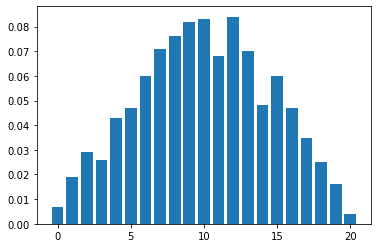

In [3]:
import random as rnd
rnd.seed(123456789)
x = np.array( rnd.choices( np.arange(0,11), k = 1000) ) # convert list to numpy array, 
y = np.array( rnd.choices( np.arange(0,11), k = 1000) ) # to achieve element-wise addition
z = x + y

import collections
counts = collections.Counter(z)  # Count variate frequencies 

import matplotlib.pyplot as plt
plt.bar( counts.keys(), np.array( list( counts.values() ) ) / len(z) ) # Barplot of relative frequencies 
plt.show()

3. Use a simulation experiment to verify the [memoryless property](https://en.wikipedia.org/wiki/Memorylessness) of the Geometric distribution. More specifically, generate 2000 random variates from the Geometric($1/2$) distribution using ```scipy.stats.geom.rvs```, and keep the values that are greater or equal to $3$, effectively conditioning on $X\ge 3$. Create a relative frequency plot of the *excess* values, i.e. the original values minus 2, and compare them to the theoretical Geometric($1/2$) PMF.

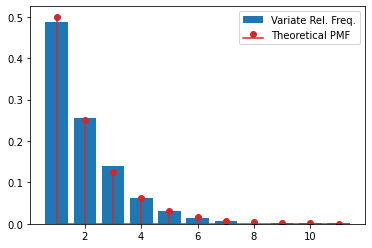

In [4]:
from scipy.stats import geom 
x = geom.rvs( p=1/2, size = 2000 )

x_xs = x[ x>2 ] - 2      # calculate conditional excess values 

counts = collections.Counter(x_xs) 

import numpy as np
plt.bar( counts.keys(), np.array( list( counts.values() ) ) / len(x_xs) ) # Barplot of relative frequencies 

plt.stem( np.arange( 1, max(x_xs)+1 ), geom.pmf( np.arange(1, max(x_xs)+1 ), 1/2), linefmt = 'C3-', markerfmt = 'C3o' ) 
plt.legend(['Variate Rel. Freq.', 'Theoretical PMF'])
plt.show()

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.